In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
#basic infromation of dataset
print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [4]:
#check missing values
print(df.isnull().sum().sort_values(ascending=False))

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
categorical_column = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in categorical_column:
    print(f'Categories in {col} : {df[col].unique()}')

Categories in mainroad : ['yes' 'no']
Categories in guestroom : ['no' 'yes']
Categories in basement : ['no' 'yes']
Categories in hotwaterheating : ['no' 'yes']
Categories in airconditioning : ['yes' 'no']
Categories in prefarea : ['yes' 'no']
Categories in furnishingstatus : ['furnished' 'semi-furnished' 'unfurnished']


In [6]:
label_encoder = LabelEncoder()
for col in categorical_column:
    df[col] = label_encoder.fit_transform(df[col])

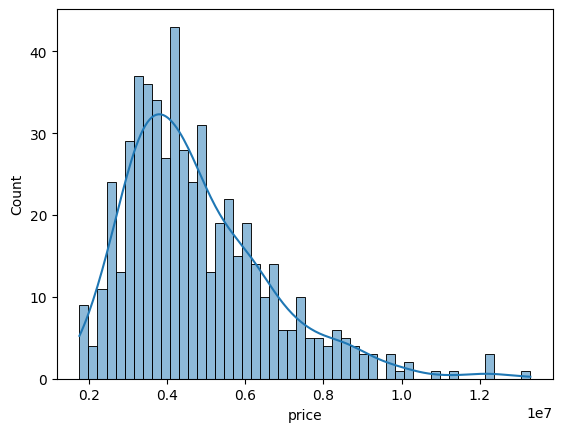

In [7]:
#Distribution of price
sns.histplot(df['price'], bins=50, kde=True) #create histogram, histogram divided into 50 bins
#kde=True → Enables the Kernel Density Estimate (KDE) plot, which smooths the histogram to show the probability density function.
plt.show()

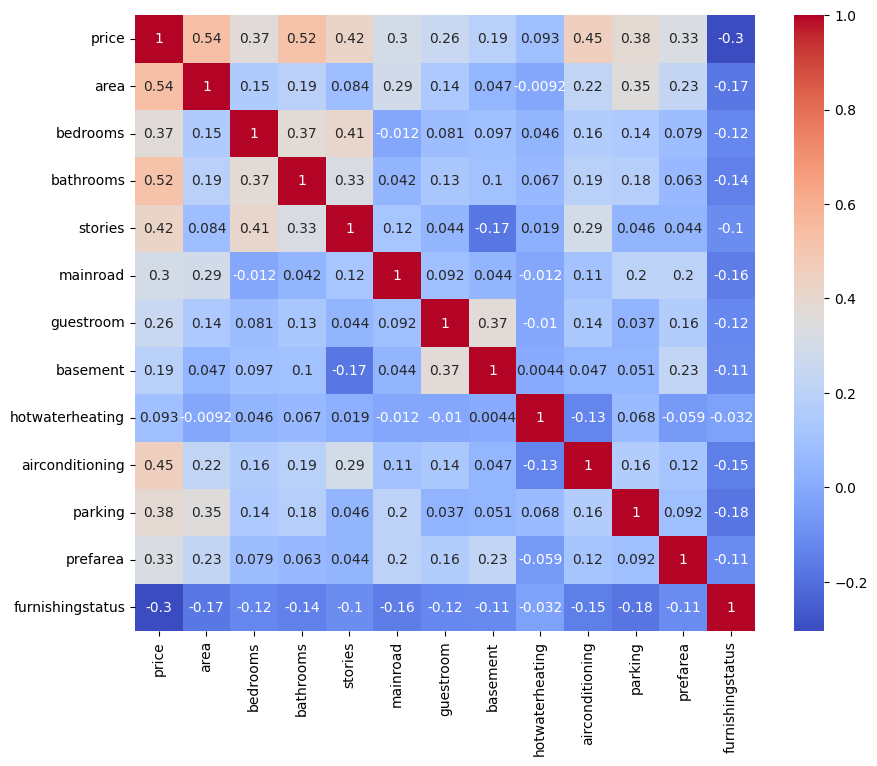

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [9]:
#remove furnishingstatus feature, because it storngly negative correlation with target variable
df = df.drop(columns=['furnishingstatus'])

In [10]:
#convert categorical variables usnig one-hot encoding
df = pd.get_dummies(df, drop_first=True)
#Normalize numerical features
scaler = StandardScaler()
df[['area','bedrooms','bathrooms','stories','parking']] = scaler.fit_transform(df[['area','bedrooms','bathrooms','stories','parking']])


In [11]:
#Split features & target
X = df.drop(columns=['price'])
y = df['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#Predictions
y_predict =model.predict(X_test)

In [17]:
#Evaluation Metrics
mae = mean_absolute_error(y_test, y_predict) #Mean Absolute Error
mse = mean_squared_error(y_test, y_predict) #Mean Squared Error
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

In [18]:
# Print Metrics
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-Squared (R2): {r2:.3f}")

Mean Absolute Error (MAE): 979112.216
Mean Squared Error (MSE): 1800793719718.971
Root Mean Squared Error (RMSE): 1341936.556
R-Squared (R2): 0.644


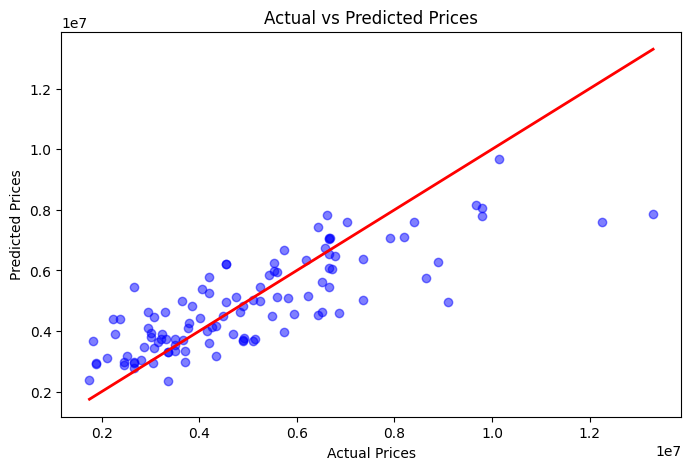

In [19]:
# Visualizing Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predict, alpha=0.5, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Diagonal line
plt.show()

In [20]:
# Save the trained model
joblib.dump(model, "house_price_prediction_model.pkl")

['house_price_prediction_model.pkl']

In [27]:
# Load the saved model
loaded_model = joblib.load("house_price_prediction_model.pkl")

# Make predictions
sample_data = X_test.iloc[:15]  # Take one sample from the test set
actual_price = y_test.iloc[:15].values[8] 
predicted_price = loaded_model.predict(sample_data)[8]


print(f"Actual House Price: ${actual_price:.2f}")
print(f"Predicted House Price: ${predicted_price:.2f}")
print(f"Difference: ${abs(actual_price - predicted_price):.2f}")



Actual House Price: $2450000.00
Predicted House Price: $2882007.07
Difference: $432007.07
